##### 支持向量机回归同样是从训练数据集中选取一部分数据点作为支持向量，这些少部分训练样本所提供的不是类别目标，而是具体的预测数值

#### 继续使用波士顿房价数据来做回归预测

### 1.数据加载

In [1]:
import numpy as np
from sklearn.datasets import load_boston
df = load_boston()

print(df.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 2.数据分割

In [2]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.data,df.target,test_size=0.25,random_state=123)

D:\softwares\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
x_train.shape

(379, 13)

In [4]:
x_test.shape

(127, 13)

In [5]:
# 查看数据分布情况
print('最大值：%s,最小值：%s,均值：%s,离差：%s'%(np.max(df.target),np.min(df.target),np.mean(df.target),np.max(df.target)-np.min(df.target)))

最大值：50.0,最小值：5.0,均值：22.5328063241,离差：45.0


In [8]:
#数据分布差异性还是较大的，因此考虑对数据的特征集目标都进行归一化处理
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_Y = StandardScaler()

x_train = ss_X.fit_transform(x_train)
x_test  = ss_X.transform(x_test)

y_train = ss_Y.fit_transform(y_train.reshape(-1,1))
y_test = ss_Y.transform(y_test.reshape(-1,1))

### 3.使用SVR进行预测

In [11]:
#使用线性核函数
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_linear.fit(x_train,y_train.ravel())
svr_linear_predict = svr_linear.predict(x_test)

In [12]:
#使用多项式核函数
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train,y_train.ravel())
svr_poly_predict = svr_poly.predict(x_test)

In [13]:
#使用径向基核函数
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train,y_train.ravel())
svr_rbf_predict = svr_rbf.predict(x_test)

### 4.对使用不同核函数的模型进行性能评估


In [14]:
print('linear R-scored:%s,poly R-scored:%s,rbf R-scored:%s'%(svr_linear.score(x_test,y_test),
                                                             svr_poly.score(x_test,y_test),svr_rbf.score(x_test,y_test)))

linear R-scored:0.637302090978,poly R-scored:0.504939673235,rbf R-scored:0.779746609136


In [15]:
## 使用MAE MSE 度量
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('linear R-scored:%s,MAE:%s,MSE:%s'%(r2_score(svr_linear_predict,y_test),
                                          mean_absolute_error(svr_linear_predict,y_test),mean_squared_error(svr_linear_predict,y_test)))

print('poly R-scored:%s,MAE:%s,MSE:%s'%(r2_score(svr_poly_predict,y_test),
                                          mean_absolute_error(svr_poly_predict,y_test),mean_squared_error(svr_poly_predict,y_test)))

print('rbf R-scored:%s,MAE:%s,MSE:%s'%(r2_score(svr_rbf_predict,y_test),
                                          mean_absolute_error(svr_rbf_predict,y_test),mean_squared_error(svr_rbf_predict,y_test)))

linear R-scored:0.520680933877,MAE:0.361216779891,MSE:0.33204845956
poly R-scored:0.518416828484,MAE:0.325369376619,MSE:0.453225714299
rbf R-scored:0.67978232038,MAE:0.259227872716,MSE:0.201641082923


In [78]:
#同样的可以使用StandardScater的inverse-transform还原标准化之前的值

### 5.特点分析

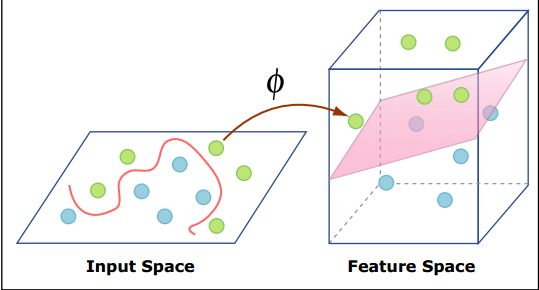

In [79]:
#使用不同的核函数，对于性能的影响还是很大的，一般情况下通过linear核函数就能获得较好的性能，当然可以多试集中核函数，以选出出最佳的性能的模型。
#核函数的作用是：将线性不可分的低维输入，映射到高维可分的特征空间
from IPython.display import Image
Image('kernel.jpg')